<a href="https://colab.research.google.com/github/HafshaWahab/YouTube-Sentiment-Analysis/blob/main/youtube_sample_size_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/JOBAAJ Projects/Module 5_EDA/6) YouTube Data Analysis/video_id_info.csv", on_bad_lines='skip')

In [ ]:
df.shape

(691400, 4)

In [ ]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
df.tail()

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [ ]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [ ]:
#drop null values
df.dropna(inplace=True)

In [ ]:
df.shape

(691374, 4)

In [ ]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 2)Performing Sentiment Analysis

In [ ]:
#TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks.

!pip install textblob

import sys     #It's called "sys" because it provides access to system-specific parameters and functions.
!{sys.executable} -m pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
# taking sample data size of 1000 data records only.
# creating a new DataFrame (sample_df) by selecting the first 1000 rows of an existing DataFrame (df).

sample_df = df[0:5000]

In [ ]:
sample_df

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
4996,eM_FR7I2Ttw,I'd love to hear Harry write like...an entire ...,1,0
4997,eM_FR7I2Ttw,This's so beautiful,2,0
4998,eM_FR7I2Ttw,nothing but respect for MY president,0,0
4999,eM_FR7I2Ttw,*To everyone who is new here: he actually perf...,2,0


In [ ]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️")      #gives a normal text.

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [ ]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment    #checking the sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [ ]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity     #checking polarity of the sentiment. So, in the output we got a neutral sentence.
                                                                  # -1: Negative, 0: Neutral, 1:Positive

0.0

In [ ]:
#running a for-loop to check the sentiments of all the data records in comment_text column.
polarity =[]    #creating a blank list to store all the sentiment values that we will get from running the loop.
for comment in sample_df['comment_text']:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)
  except:
      polarity.append(0)

In [ ]:
len(polarity)

5000

In [ ]:
sample_df['polarity'] = polarity

In [ ]:
sample_df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## 3)Wordcloud Analysis of Data

In [ ]:
filter1 = sample_df['polarity']==1
comments_positive = sample_df[filter1]
sample_df[filter1]

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
4953,eM_FR7I2Ttw,"*YES IT IS TRENDING, SO PROUD OF HIM!!*",3,0,1.0
4955,eM_FR7I2Ttw,One of the best rock stars In years...!,3,0,1.0
4974,eM_FR7I2Ttw,He is no Lindsey Buckingham but it was good!!,0,0,1.0
4992,eM_FR7I2Ttw,THIS IS BEAUTIFUL! THOSE VOCALS,1,0,1.0


In [ ]:
filter2 = sample_df['polarity']==-1
comments_negative = sample_df[filter2]
sample_df[filter2]

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
1932,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
2043,B7YaMkCl3XA,Economy is horrible in Cuba. It's going to be ...,0,0,-1.0
2088,B7YaMkCl3XA,Sub to me if this is terrible,0,1,-1.0
2192,5ywKal6-anc,PATHETIC,1,0,-1.0
2410,EVp4-qjWVJE,I don't like this sportscaster sounds very an...,0,0,-1.0


In [ ]:
!pip install wordcloud
import sys
!{sys.executable} -m pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
#Stopwords are common words like "the," "is," and "and" that are often removed from text during analysis because they don't carry significant meaning.

In [ ]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
sample_df['comment_text']

0                       Logan Paul it's yo big day ‼️‼️‼️
1       I've been following you from the start of your...
2                      Say hi to Kong and maverick for me
3                                     MY FAN . attendance
4                                              trending 😉
                              ...                        
4996    I'd love to hear Harry write like...an entire ...
4997                                  This's so beautiful
4998                 nothing but respect for MY president
4999    *To everyone who is new here: he actually perf...
5000                              This cover is perfect !
Name: comment_text, Length: 5000, dtype: object

In [ ]:
type(sample_df['comment_text'])

pandas.core.series.Series

In [ ]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
# joins all the text data from the 'comment_text' column in the DataFrame 'comments_positive' into a single string, separated by spaces.
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [ ]:
total_comments_positive

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [ ]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

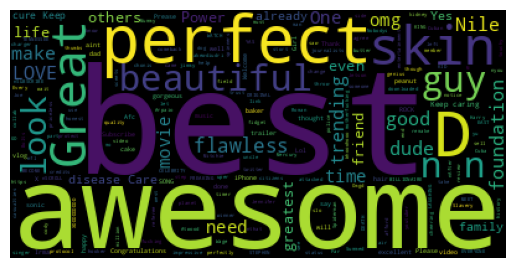

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

***Hence, some of the positive words are: awesome, best, love, great, perfect, beautiful, video, etc.***

In [ ]:
total_comments_negative = ' '.join(comments_negative['comment_text'])
total_comments_negative

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

In [ ]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

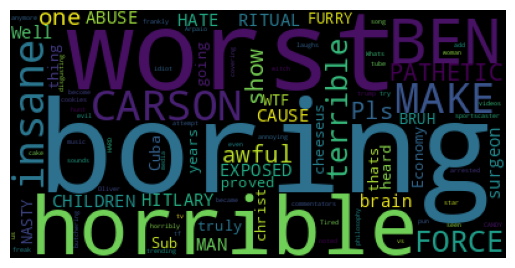

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

***Hence, some of the negative words are boring, worst, terrible, horrible, pathetic, cruel, insane, etc.***

## 4) Performing Emoji Analysis

In [ ]:
!pip install emoji==2.10.1

In [ ]:
import sys
!{sys.executable} -m pip install emoji==2.10.1

In [ ]:
import emoji

In [ ]:
emoji.__version__

'2.10.1'

In [ ]:
comment = 'trending 😉'

In [ ]:
#extracting emoji from the sentence
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [ ]:
emo_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emo_list.append(char)

emo_list

['😉']

In [ ]:
#iterating loop to extract all the emojis
all_emoji_list=[]
for comment in sample_df['comment_text'].dropna():
  for char in comment:
    if char in emoji.EMOJI_DATA:
      all_emoji_list.append(char)

#Displaying only first 10 emojis. We can also display more emojis by not defining the size.
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

**Now we will check the frequency of each and every emoji.**

In [ ]:
from collections import Counter

In [ ]:
Counter(all_emoji_list).most_common(10)

[('😂', 333),
 ('😍', 231),
 ('❤', 176),
 ('😊', 51),
 ('🔥', 44),
 ('💖', 42),
 ('👍', 41),
 ('👏', 40),
 ('🏻', 37),
 ('😮', 36)]

In [ ]:
# checking frequency of the first emoji only
Counter(all_emoji_list).most_common(10)[0]

('😂', 333)

In [ ]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [ ]:
Counter(all_emoji_list).most_common(10)[0][1]

333

In [ ]:
# checking frequency of the second emoji only
Counter(all_emoji_list).most_common(10)[1]

('😍', 231)

In [ ]:
#displaying only the emoji list containing all the emojis
emojis = [Counter(all_emoji_list).most_common(20)[i][0] for i in range(20)]
emojis

['😂',
 '😍',
 '❤',
 '😊',
 '🔥',
 '💖',
 '👍',
 '👏',
 '🏻',
 '😮',
 '😭',
 '💕',
 '😘',
 '😁',
 '👌',
 '😆',
 '🙏',
 '💋',
 '🙌',
 '😻']

In [ ]:
freqs = [Counter(all_emoji_list).most_common(20)[i][1] for i in range(20)]
freqs

[333,
 231,
 176,
 51,
 44,
 42,
 41,
 40,
 37,
 36,
 33,
 30,
 28,
 23,
 21,
 20,
 19,
 18,
 18,
 16]

In [ ]:
import plotly.io as pio
# Set the renderer for Google Colab
pio.renderers.default = 'colab'

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
# Generate a list of colors (you can customize this list with more colors if needed)
colors = [
    '#FF6347', '#6A5ACD', '#20B2AA', '#FF69B4', '#87CEFA',
    '#32CD32', '#FFA07A', '#778899', '#B0C4DE', '#FFFF54',
    '#40E0D0', '#EE82EE', '#FF6347', '#6A5ACD', '#20B2AA',
    '#FF69B4', '#87CEFA', '#32CD32', '#FFA07A', '#778899'
]
trace = go.Bar(x=emojis, y=freqs, text=freqs,textposition='auto', marker=dict(color=colors))

# Create the figure
fig = go.Figure(data=[trace])
# Update layout with axis labels and x-tick label size
fig.update_layout(
    title='Emoji Frequency',
    xaxis_title='Emojis',
    yaxis_title='Frequency',
    xaxis=dict(
        tickfont=dict(size=20),
        showgrid=False
    ),
    yaxis=dict(
        showgrid=False
)
)

# Show the figure
fig.show()

***Hence, maximum users are happy with the particular YouTube content.***

## Analysing entire data on YouTube

In [ ]:
import os

In [ ]:
files = os.listdir('/content/drive/MyDrive/JOBAAJ Projects/Module 5_EDA/6) YouTube Data Analysis/YT_additional_data')
files

['US_category_id.json',
 'RU_category_id.json',
 'README.md',
 'MX_category_id.json',
 'KR_category_id.json',
 'GB_category_id.json',
 'FR_category_id.json',
 'CA_category_id.json',
 'DE_category_id.json',
 'IN_category_id.json',
 'JP_category_id.json',
 'CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'INvideos.csv',
 'GBvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'USvideos.csv',
 'RUvideos.csv']

In [ ]:
files_csv = [file for file in files if '.csv' in file]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'INvideos.csv',
 'GBvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'USvideos.csv',
 'RUvideos.csv']

In [ ]:
#while colllecting the data if you encounter any kind of warning its always a good practice to import  warning modules.

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#storing all the csv files in one dataframe

full_df = pd.DataFrame()
path = '/content/drive/MyDrive/JOBAAJ Projects/Module 5_EDA/6) YouTube Data Analysis/YT_additional_data'

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1')
    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [ ]:
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,OMmR9THjVKM,18.14.06,Ð£ Ð¼ÐµÐ½Ñ Ð¡ÐÐÐ! (Story booth Ð½Ð° ÑÑÑ...,Pastime Time,22,2018-06-13T13:47:01.000Z,"story booth Ð½Ð° ÑÑÑÑÐºÐ¾Ð¼|""story booth Ð...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,ÐÐ¾ÑÐ¸ÐºÐ¸ Ð² Blade and Soul - https://bit.l...
375938,tX7p7NtNVDE,18.14.06,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...,CaGArt,23,2018-06-12T09:38:38.000Z,"ÐºÐ°Ð³Ð°ÑÑ|""ÐºÐ°Ð³Ð¸""|""ÑÐ°Ð³Ð°ÑÑ""|""Ð³Ð°Ð³...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...
375939,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24,2018-06-13T12:51:23.000Z,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...
375940,4PiSLIrsSiY,18.14.06,ÐÐÐÐÐ ÐÐÐÐÐÐ ÐÐÐÐÐÐ¢Ð«ð/Ð¢Ð...,ÐÑÑÑÐ° ÐÐµÐ±ÐµÐ´ÐµÐ²Ð°,22,2018-06-13T00:23:33.000Z,"ÑÑÐ¼ ÑÑÑ Ð²Ð°Ð½Ð½Ð¾Ð¹ ÐºÐ¾Ð¼Ð½Ð°ÑÑ|""roo...",14225,793,39,209,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,"ÐÐ±Ð·Ð¾Ñ Ð²Ð°Ð½Ð½Ð¾Ð¹ ÐºÐ¾Ð¼Ð½Ð°ÑÑ, ÑÑÐ°..."


In [ ]:
full_df.shape

(375942, 16)

In [ ]:
# Checking for duplicate records of data
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937    False
375938    False
375939     True
375940    False
375941    False
Length: 375942, dtype: bool

In [ ]:
full_df[full_df.duplicated()].shape

(36417, 16)

***So, we have 36417 records of duplicated data.***

In [ ]:
#dropping the duplicate values
full_df = full_df.drop_duplicates()

In [ ]:
full_df.shape

(339525, 16)

### Which category has the maximum likes?

In [ ]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [ ]:
full_df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               17977
dtype: int64

In [ ]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### Which content category has the maximum likes?

In [ ]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [ ]:
# Let's read any json file from the folder

json_df = pd.read_json('/content/drive/MyDrive/JOBAAJ Projects/Module 5_EDA/6) YouTube Data Analysis/YT_additional_data/US_category_id.json')
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [ ]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [ ]:
#Extract channel ID and title in a dictionary
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [ ]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [ ]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [ ]:
# create new column of category name
full_df['category_name'] = full_df['category_id'].map(cat_dict)
full_df['category_name']

0                         Music
1                        Comedy
2                        Comedy
3                 Entertainment
4                         Music
                  ...          
375936                   Sports
375937           People & Blogs
375938                   Comedy
375940           People & Blogs
375941    Nonprofits & Activism
Name: category_name, Length: 339525, dtype: object

In [ ]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


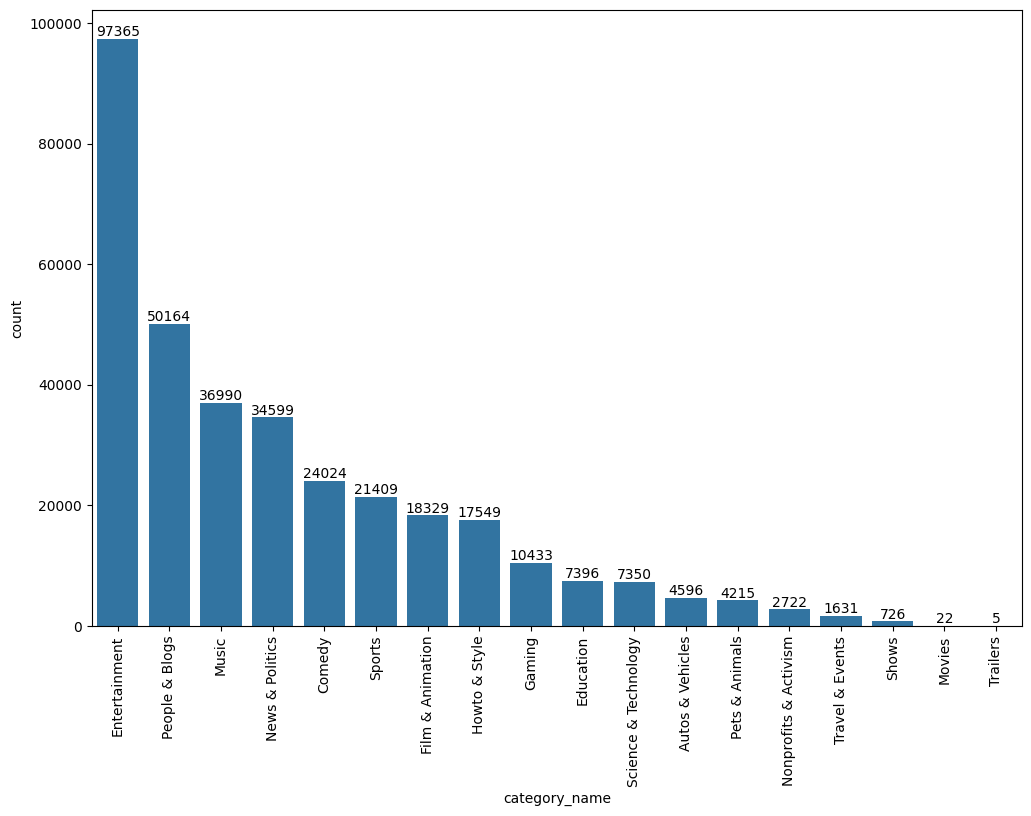

In [ ]:
# Step 1: Calculate counts and sort them
category_counts = full_df['category_name'].value_counts().sort_values(ascending=False)

# Step 2: Create a new DataFrame with sorted categories
sorted_df = pd.DataFrame({'category_name': category_counts.index, 'count': category_counts.values})

plt.figure(figsize=(12,8))
# ax=sns.countplot(x='category_name', data=full_df)
ax = sns.barplot(x='category_name', y='count', data=sorted_df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation='vertical')
plt.show()

## Find whether the audience is engaged or not.

In [ ]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


In [ ]:
engagement=(full_df['likes']/full_df['views'])*100
engagement

0          4.589104
1         12.594873
2          4.575843
3          6.309630
4          4.874563
            ...    
375936     5.386815
375937     4.551001
375938     4.698325
375940     5.574692
375941    14.726786
Length: 339525, dtype: float64

In [ ]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [ ]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


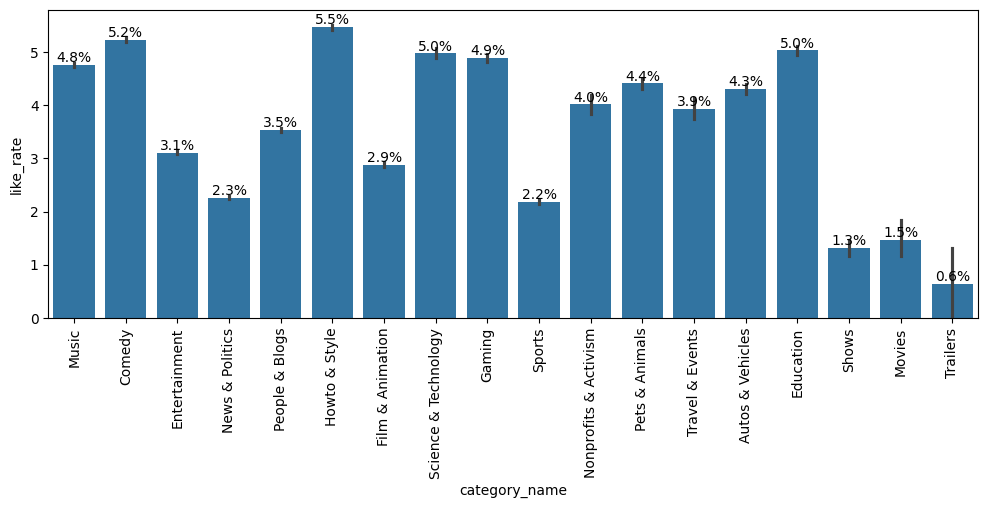

In [ ]:
#plotting like rate against category name
plt.figure(figsize=(12,4))
ax=sns.barplot(x='category_name', y='like_rate', data= full_df, order=full_df['category_name'])
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{h.get_height():.1f}%' for h in bars], label_type='edge')
plt.xticks(rotation='vertical')
#plt.grid(True)
plt.show()

***We can see that How to Style, Comedy, Science & Technology and Education are the most liked categories by the users.***

## Analysing Relationship between Views and Likes

<Axes: xlabel='views', ylabel='likes'>

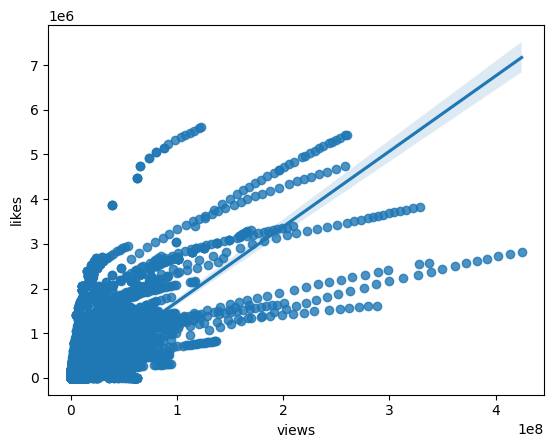

In [ ]:
sns.regplot(x='views', y='likes', data=full_df)

In [ ]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [ ]:
full_df[['views', 'likes', 'dislikes']]

,views,likes,dislikes
0,17158579,787425,43420
1,1014651,127794,1688
2,3191434,146035,5339
3,2095828,132239,1989
4,33523622,1634130,21082
...,...,...,...
375936,70654,3806,87
375937,129488,5893,164
375938,99163,4659,337
375940,14225,793,39


**Find Correlation between 'views', 'likes', 'dislikes'**

In [ ]:
full_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

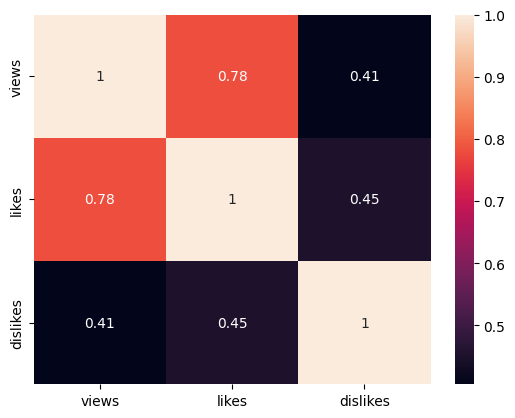

In [ ]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot=True)

## Which Channel has the largest no. of trending videos?

In [ ]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


In [ ]:
#Count of Unique Channels
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daijea Yo                               1
Tactical Elite Squad Airsoft            1
NightcoreZodiac                         1
Leyendas & Videojuegos                  1
Tubus Show                              1
Name: count, Length: 37824, dtype: int64

In [ ]:
#performing the same above operation by using Group by
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [ ]:
#Rename the third column
cdf=cdf.rename(columns={0:"total_videos"})

In [ ]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [ ]:
import plotly.express as px
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')

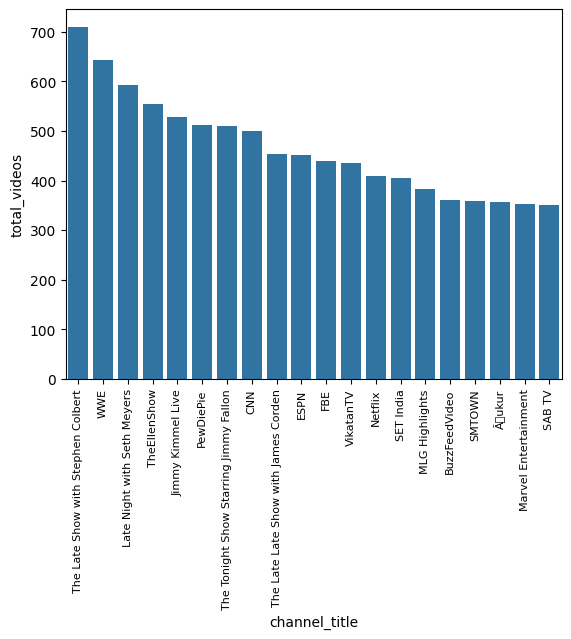

<Figure size 1800x500 with 0 Axes>

In [ ]:
sns.barplot(data=cdf[0:20], x='channel_title', y='total_videos')
plt.xticks(rotation='vertical',fontsize=8)
plt.figure(figsize=(18,5))
plt.show()